# Libraries

LAMID
CATAID
DFAflux_GALEXFUV
DFAErr_GALEXFUV
DeblendErr_GALEXFUV
ABMagDFA_GALEXFUV
ABMagErrDFA_GALEXFUV
MinApCorr_GALEXFUV
MaxApCorr_GALEXFUV
PhotometryWarning_GALEXFUV
PhotometryFlag_GALEXFUV
DFAflux_GALEXNUV
DFAErr_GALEXNUV
DeblendErr_GALEXNUV
ABMagDFA_GALEXNUV
ABMagErrDFA_GALEXNUV
MinApCorr_GALEXNUV
MaxApCorr_GALEXNUV
PhotometryWarning_GALEXNUV
PhotometryFlag_GALEXNUV
DFAflux_SDSSu
DFAErr_SDSSu
DeblendErr_SDSSu
ABMagDFA_SDSSu
ABMagErrDFA_SDSSu
MinApCorr_SDSSu
MaxApCorr_SDSSu
PhotometryWarning_SDSSu
PhotometryFlag_SDSSu
DFAflux_SDSSg
DFAErr_SDSSg
DeblendErr_SDSSg
ABMagDFA_SDSSg
ABMagErrDFA_SDSSg
MinApCorr_SDSSg
MaxApCorr_SDSSg
PhotometryWarning_SDSSg
PhotometryFlag_SDSSg
DFAflux_SDSSr
DFAErr_SDSSr
DeblendErr_SDSSr
ABMagDFA_SDSSr
ABMagErrDFA_SDSSr
MinApCorr_SDSSr
MaxApCorr_SDSSr
PhotometryWarning_SDSSr
PhotometryFlag_SDSSr
DFAflux_SDSSi
DFAErr_SDSSi
DeblendErr_SDSSi
ABMagDFA_SDSSi
ABMagErrDFA_SDSSi
MinApCorr_SDSSi
MaxApCorr_SDSSi
PhotometryWarning_SDSSi
PhotometryFlag_SDSSi
DFAflux_S

WHAN classification
Star forming: 34209
Strong AGN: 22360
Weak AGN: 6115
Retired: 14435
Passive: 551
Unclassified: 41798  should be equal to  41798


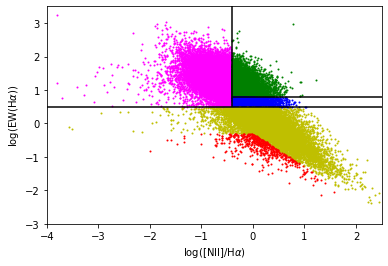

BPT classification
Star forming: 19324
Seyfert: 7269
LINERs: 2383
Composite: 26350
Unclassified: 64142  should be equal to  64142


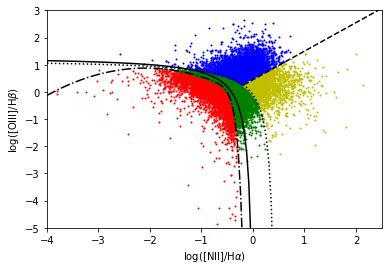

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from ipynb.fs.full.functions2 import *

In [2]:
plt.rcParams.update(params)

# Diagrams for new data

# BPT diagram

In [3]:
x1 = data_BPT1['NIIR_FLUX']/data_BPT1['HA_FLUX']
y1 = data_BPT1['OIIIR_FLUX']/data_BPT1['HB_FLUX']

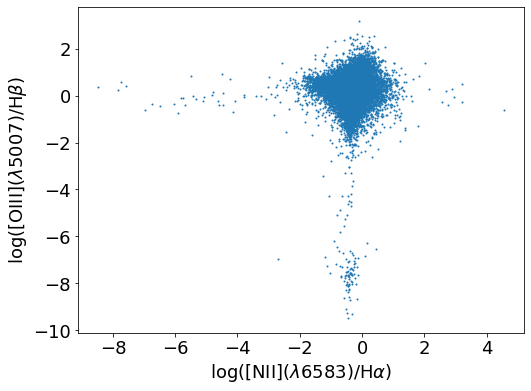

In [4]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.show()

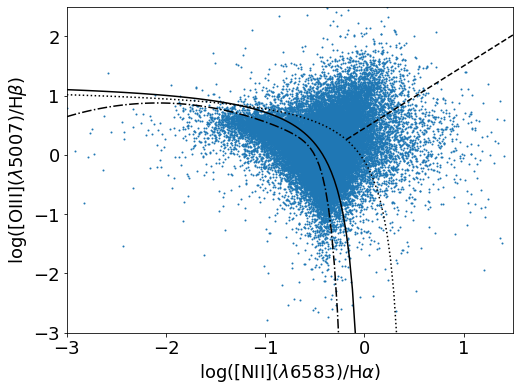

In [5]:
plt.plot(np.log10(x1), np.log10(y1), ls='', marker='o', markersize=1)

xx1 = np.linspace(-3, 0.4, 100)
xx2 = np.linspace(-3, 0, 100)
xx3 = np.linspace(-3, 0, 100)
xx4 = np.linspace(-0.18, 1.5, 100)

plt.plot(xx1, Kewley(xx1), ls='dotted', c='k', label='Kewley+01')
plt.plot(xx2, Kauffmann(xx2), ls='-', c='k', label='Kauffman+03')
plt.plot(xx3, Stasinska(xx3), ls='-.', c='k', label='Stasińska+06')
plt.plot(xx4, Schawinski(xx4), ls='--', c='k', label='Schawinski+07')

plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-3,1.5)
plt.ylim(-3,2.5)
plt.show()

In [6]:
x2 = data_BPT2['OIB_FLUX']/data_BPT2['HA_FLUX']
y2 = data_BPT2['OIIIR_FLUX']/data_BPT2['HB_FLUX']

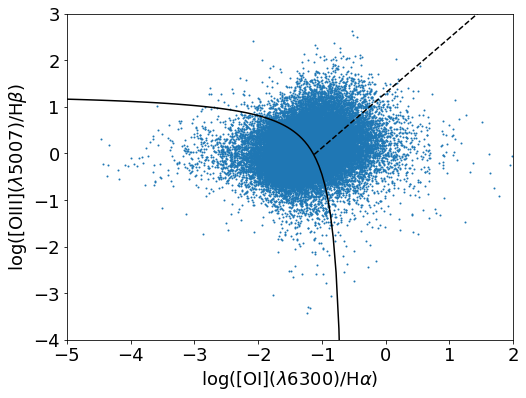

In [7]:
plt.plot(np.log10(x2), np.log10(y2), ls='', marker='o', markersize=1)

x0 = np.linspace(-5, -0.6, 100)
plt.plot(x0, main_AGN_BPT2(x0), c='k')

x0 = np.linspace(-1.12, 2, 100)
plt.plot(x0, LINER_SY2_BPT2(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{OI}](\lambda 6300)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-5,2)
plt.ylim(-4,3)
plt.show()

In [8]:
x3 = (data_BPT3['SIIR_FLUX']+data_BPT3['SIIB_FLUX'])/data_BPT3['HA_FLUX']
y3 = data_BPT3['OIIIR_FLUX']/data_BPT3['HB_FLUX']

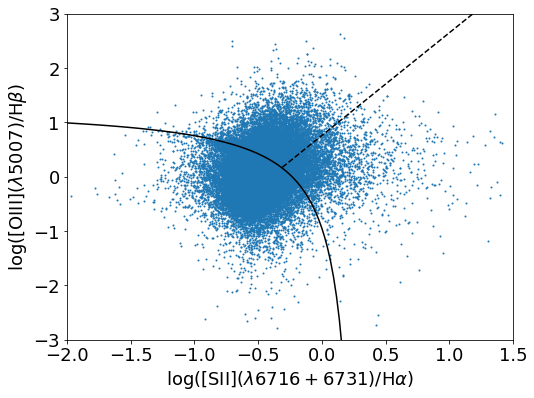

In [9]:
plt.plot(np.log10(x3), np.log10(y3), ls='', marker='o', markersize=1)

x0 = np.linspace(-2, 0.3, 100)
plt.plot(x0, main_AGN_BPT3(x0), c='k')

x0 = np.linspace(-0.31, 1.5, 100)
plt.plot(x0, LINER_SY2_BPT3(x0), c='k', ls='--')

plt.xlabel(r'$\log([\mathrm{SII}](\lambda 6716+6731)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-2,1.5)
plt.ylim(-3,3)
plt.show()

In [10]:
x4 = data_Stasinska1['OIIB_FLUX']/data_Stasinska1['HB_FLUX']
y4 = data_Stasinska1['OIIIR_FLUX']/data_Stasinska1['HB_FLUX']

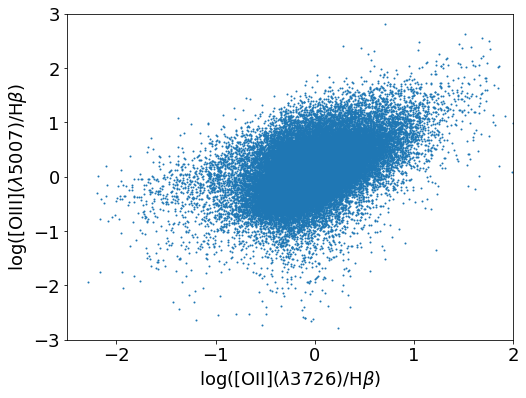

In [11]:
plt.plot(np.log10(x4), np.log10(y4), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{OII}](\lambda 3726)/\mathrm{H}\beta)$')
plt.ylabel(r'$\log([\mathrm{OIII}](\lambda 5007)/\mathrm{H}\beta)$')
plt.xlim(-2.5,2)
plt.ylim(-3,3)
plt.show()

# WHAN diagram

In [12]:
x5 = data_WHAN['NIIR_FLUX']/data_WHAN['HA_FLUX']
y5 = data_WHAN['HA_EW']

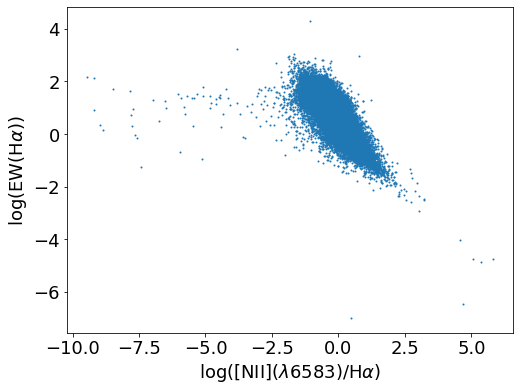

In [13]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.show()

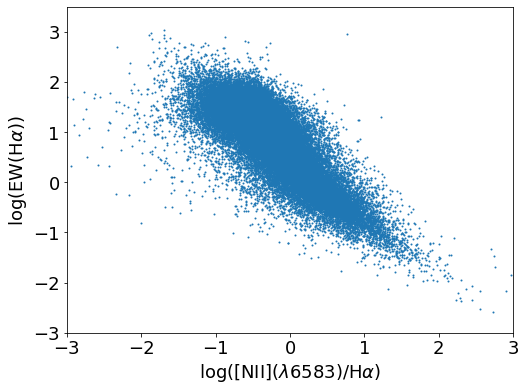

In [14]:
plt.plot(np.log10(x5), np.log10(y5), ls='', marker='o', markersize=1)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'$\log(\mathrm{EW}(\mathrm{H}\alpha))$')
plt.xlim(-3,3)
plt.ylim(-3,3.5)
plt.show()

# Spectra

In [15]:
l_pivot = [1535, 2301, 3557, 4702, 6175, 7491, 8946, 8800, 10213, 12525, 16433, 21503, 
           3.37*10**4, 4.62*10**4, 12.1*10**4, 22.8*10**4, 101*10**4, 161*10**4, 249*10**4, 357*10**4, 504*10**4]
flux = [max(data_raw['DFAflux_GALEXFUV']), max(data_raw['DFAflux_GALEXNUV']), max(data_raw['DFAflux_SDSSu']), 
        max(data_raw['DFAflux_SDSSg']), max(data_raw['DFAflux_SDSSr']), max(data_raw['DFAflux_SDSSi']), 
        max(data_raw['DFAflux_SDSSz']), max(data_raw['DFAflux_VIKINGZ']), max(data_raw['DFAflux_VIKINGY']), 
        max(data_raw['DFAflux_VIKINGJ']), max(data_raw['DFAflux_VIKINGH']), max(data_raw['DFAflux_VIKINGK']), 
        max(data_raw['DFAflux_WISEW1']), max(data_raw['DFAflux_WISEW2']), max(data_raw['DFAflux_WISEW3']), 
        max(data_raw['DFAflux_WISEW4']), max(data_raw['DFAflux_PACS100']), max(data_raw['DFAflux_PACS160']), 
        max(data_raw['DFAflux_SPIRE250']), max(data_raw['DFAflux_SPIRE350']), max(data_raw['DFAflux_SPIRE500'])]

Text(0, 0.5, '$\\log(F)$ (Jy)')

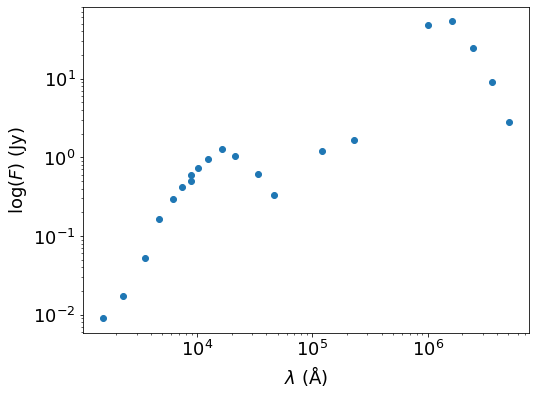

In [16]:
plt.scatter(l_pivot, flux)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\lambda$ ($\mathrm{\AA}$)')
plt.ylabel(r'$\log(F)$ (Jy)')

# Plots

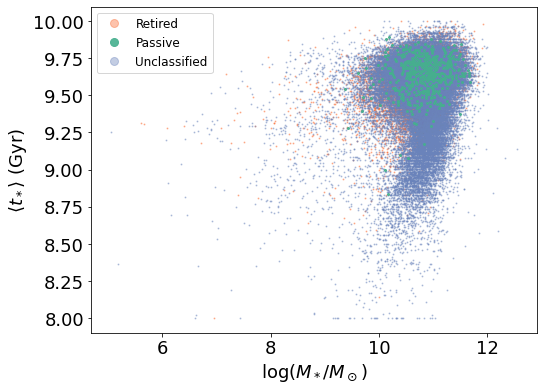

In [17]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ager_percentile50'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ager_percentile50'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ager_percentile50'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\left< t_* \right>$ (Gyr)')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

/home/klavdia/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


(array([1442., 1444., 1443., 1441., 1447., 1444., 1445., 1443., 1444.,
        1442.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

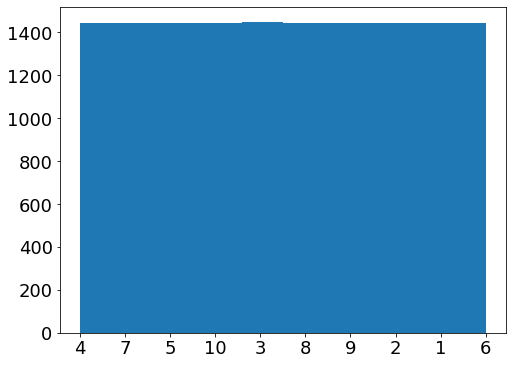

In [18]:
retired['age_new'] = pd.qcut(np.log10(retired['mass_stellar_best_fit']), q=10, labels=['1', '2', '3', '4', '5',
                                                                                       '6', '7', '8', '9', '10'])
plt.hist(retired['age_new'])

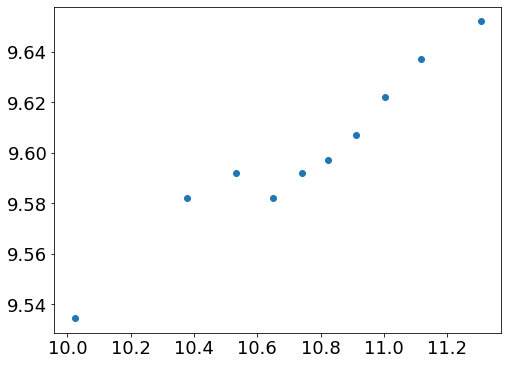

In [19]:
x = np.zeros(10)
y = np.zeros(10)

one = retired[retired['age_new'] == '1']
x[0] = np.log10(one['mass_stellar_best_fit'].median())
y[0] = one['ager_percentile50'].median()

two = retired[retired['age_new'] == '2']
x[1] = np.log10(two['mass_stellar_best_fit'].median())
y[1] = two['ager_percentile50'].median()

three = retired[retired['age_new'] == '3']
x[2] = np.log10(three['mass_stellar_best_fit'].median())
y[2] = three['ager_percentile50'].median()

four = retired[retired['age_new'] == '4']
x[3] = np.log10(four['mass_stellar_best_fit'].median())
y[3] = four['ager_percentile50'].median()

five = retired[retired['age_new'] == '5']
x[4] = np.log10(five['mass_stellar_best_fit'].median())
y[4] = five['ager_percentile50'].median()

six = retired[retired['age_new'] == '6']
x[5] = np.log10(six['mass_stellar_best_fit'].median())
y[5] = six['ager_percentile50'].median()

seven = retired[retired['age_new'] == '7']
x[6] = np.log10(seven['mass_stellar_best_fit'].median())
y[6] = seven['ager_percentile50'].median()

eight = retired[retired['age_new'] == '8']
x[7] = np.log10(eight['mass_stellar_best_fit'].median())
y[7] = eight['ager_percentile50'].median()

nine = retired[retired['age_new'] == '9']
x[8] = np.log10(nine['mass_stellar_best_fit'].median())
y[8] = nine['ager_percentile50'].median()

ten = retired[retired['age_new'] == '10']
x[9] = np.log10(ten['mass_stellar_best_fit'].median())
y[9] = ten['ager_percentile50'].median()

plt.scatter(x,y)

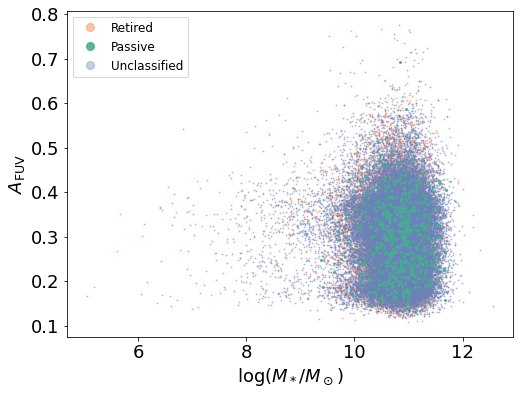

In [20]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_FUV'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_FUV'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_FUV'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{FUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

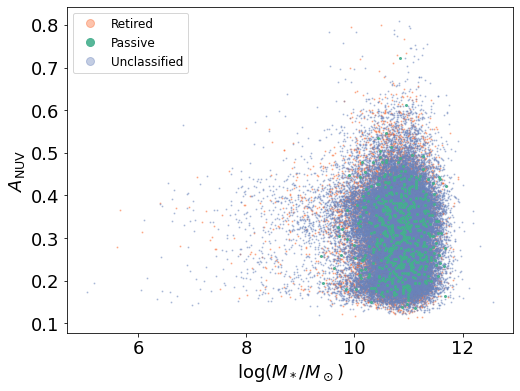

In [21]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_NUV'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_NUV'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_NUV'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_\mathrm{NUV}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

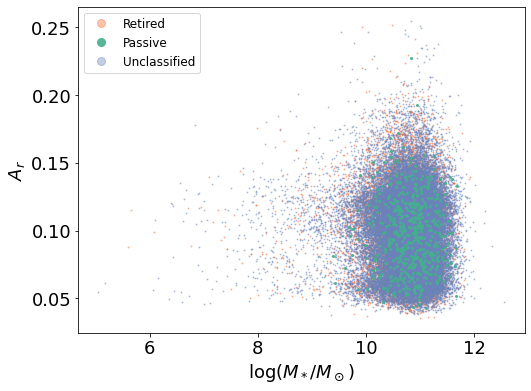

In [22]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_r'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_r'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_r'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{r}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

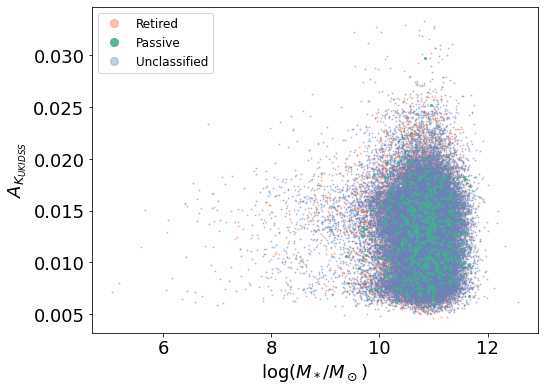

In [23]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_UKIDSS'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_UKIDSS'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_UKIDSS'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{UKIDSS}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

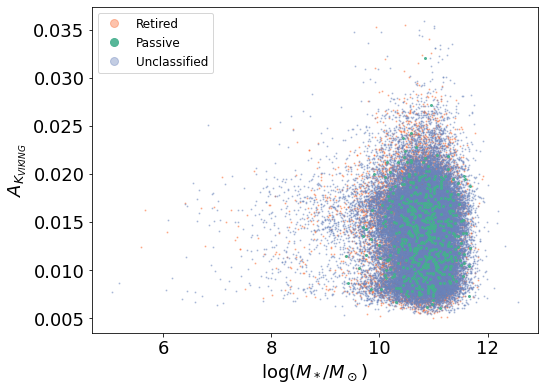

In [24]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['A_K_VIKING'], ls='', marker='o', markersize=1, c=palette_darker[1], 
         alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['A_K_VIKING'], ls='', marker='o', markersize=2, c=palette_darker[0], 
         alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['A_K_VIKING'], ls='', marker='o', markersize=1, 
         c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$A_{K_{VIKING}}$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

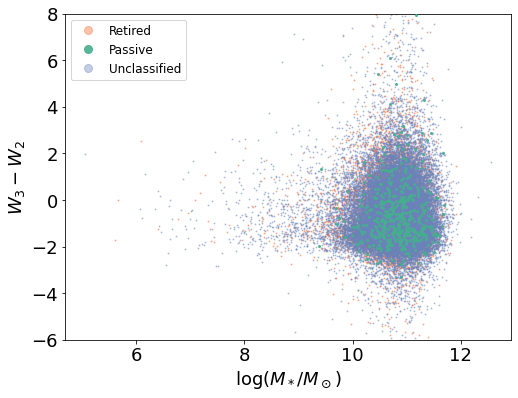

In [25]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ABMagDFA_WISEW3']-retired['ABMagDFA_WISEW2'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ABMagDFA_WISEW3']-passive['ABMagDFA_WISEW2'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ABMagDFA_WISEW3']-unclassified['ABMagDFA_WISEW2'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.ylim(-6,8)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$W_3-W_2$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

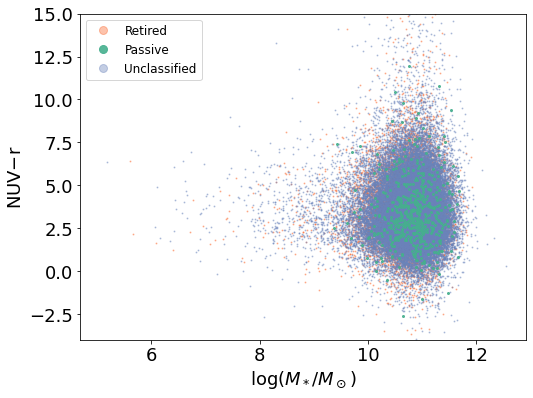

In [26]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['ABMagDFA_GALEXNUV']-retired['ABMagDFA_SDSSr'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['ABMagDFA_GALEXNUV']-passive['ABMagDFA_SDSSr'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['ABMagDFA_GALEXNUV']-unclassified['ABMagDFA_SDSSr'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.ylim(-4,15)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel('NUV$-$r')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

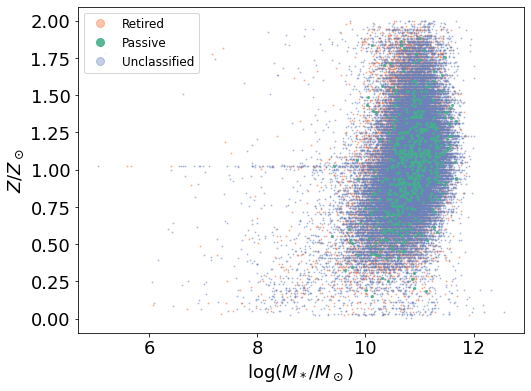

In [27]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['metalicity_Z_Zo_percentile50'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['metalicity_Z_Zo_percentile50'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$Z/Z_\odot$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

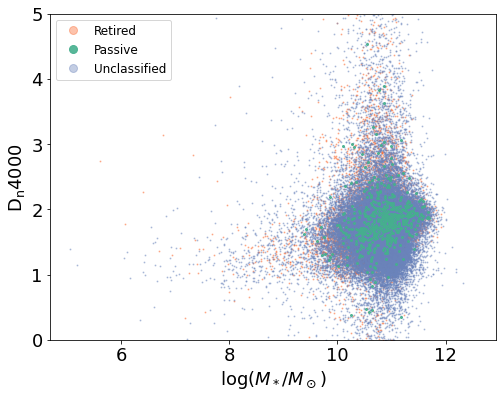

In [28]:
plt.plot(np.log10(retired['mass_stellar_best_fit']), retired['D4000N'], ls='', marker='o', 
         markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive['mass_stellar_best_fit']), passive['D4000N'], ls='', marker='o', 
         markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified['mass_stellar_best_fit']), unclassified['D4000N'], ls='', 
         marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

#plt.xlim(9,12)
plt.ylim(0, 5)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'D$_\mathrm{n}4000$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

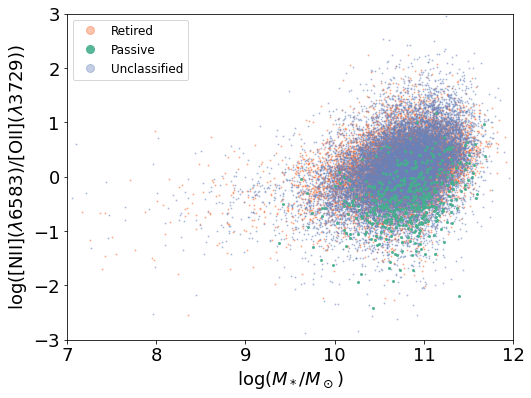

In [29]:
plt.plot(np.log10(retired_NIIR_OIIR['mass_stellar_best_fit']), np.log10(retired_NIIR_OIIR['NIIR_FLUX']/retired_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=1, c=palette_darker[1], alpha=0.4, label='Retired')
plt.plot(np.log10(passive_NIIR_OIIR['mass_stellar_best_fit']), np.log10(passive_NIIR_OIIR['NIIR_FLUX']/passive_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=2, c=palette_darker[0], alpha=0.9, label='Passive', zorder=10)
plt.plot(np.log10(unclassified_NIIR_OIIR['mass_stellar_best_fit']), np.log10(unclassified_NIIR_OIIR['NIIR_FLUX']/unclassified_NIIR_OIIR['OIIR_FLUX']), 
         ls='', marker='o', markersize=1, c=palette_darker[2], alpha=0.4, label='Unclassified')

plt.xlim(7, 12)
plt.ylim(-3,3)
plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log([\mathrm{NII}](\lambda 6583)/[\mathrm{OII}](\lambda 3729))$')

legend = plt.legend()
for legend_handle in legend.legendHandles:
    legend_handle._legmarker.set_markersize(8)

plt.show()

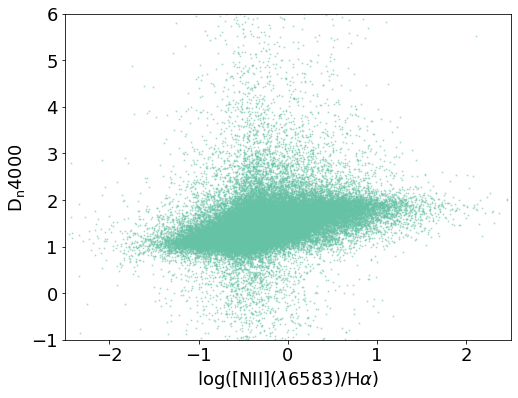

In [30]:
plt.plot(np.log10(NIIR_Ha_data['NIIR_FLUX']/NIIR_Ha_data['HA_FLUX']), NIIR_Ha_data['D4000N'], ls='', marker='o', 
         markersize=1, c=palette[0], alpha=0.4)
plt.xlim(-2.5, 2.5)
plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{NII}](\lambda 6583)/\mathrm{H}\alpha)$')
plt.ylabel(r'D$_\mathrm{n}4000$')
plt.show()

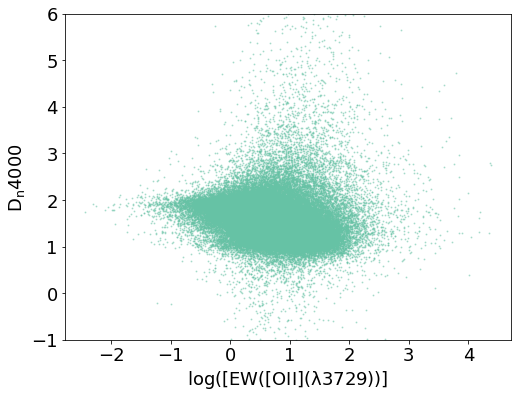

In [31]:
plt.plot(np.log10(EW_OII_data['OIIR_EW']), EW_OII_data['D4000N'], ls='', marker='o', markersize=1, 
         c=palette[0], alpha=0.4)
plt.ylim(-1,6)
plt.xlabel(r'$\log([\mathrm{EW([OII](\lambda 3729))}]$')
plt.ylabel(r'D$_\mathrm{n}4000$')
plt.show()

# Histograms/kdeplots

Text(0.5, 0, '$\\log([OIII](\\lambda 5007)/[NII](\\lambda 6583))$')

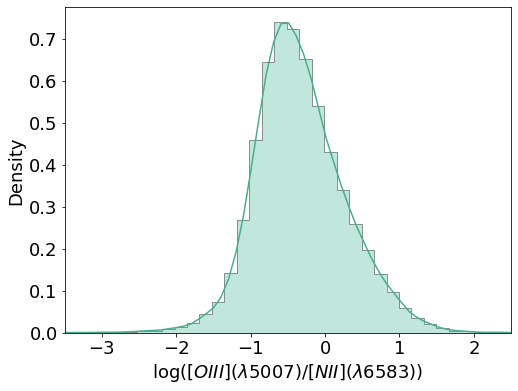

In [32]:
x = OIIIR_NIIR_data['OIIIR_FLUX']/OIIIR_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([OIII](\\lambda 4959)/[NII](\\lambda 6583))$')

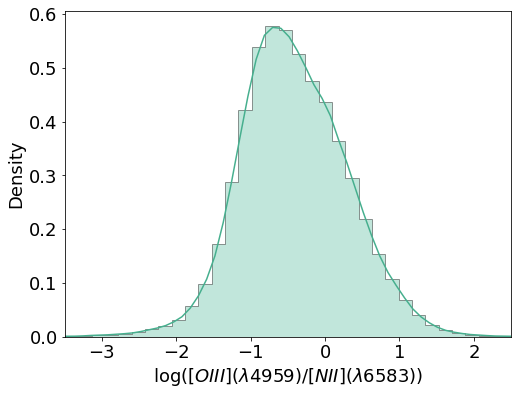

In [33]:
x = OIIIB_NIIR_data['OIIIB_FLUX']/OIIIB_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([OII](\\lambda 3729)/[NII](\\lambda 6583))$')

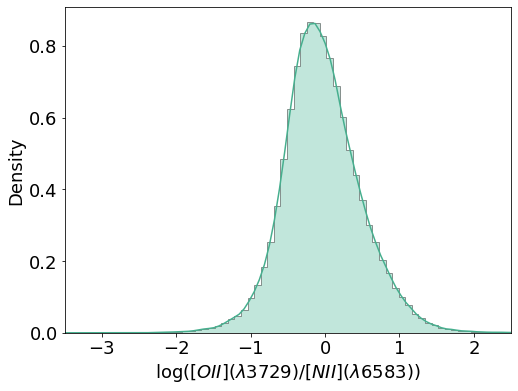

In [34]:
x = OIIR_NIIR_data['OIIR_FLUX']/OIIR_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([OII](\\lambda 3726)/[NII](\\lambda 6583))$')

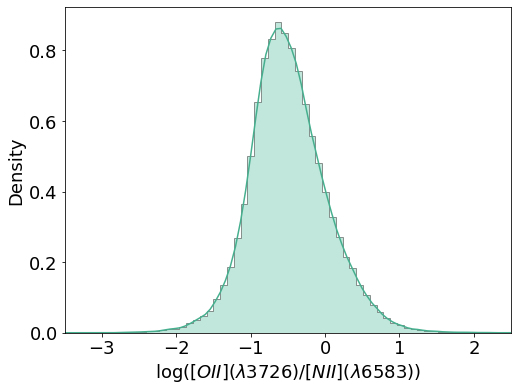

In [35]:
x = OIIB_NIIR_data['OIIB_FLUX']/OIIB_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([OI](\\lambda 6364)/[NII](\\lambda 6583))$')

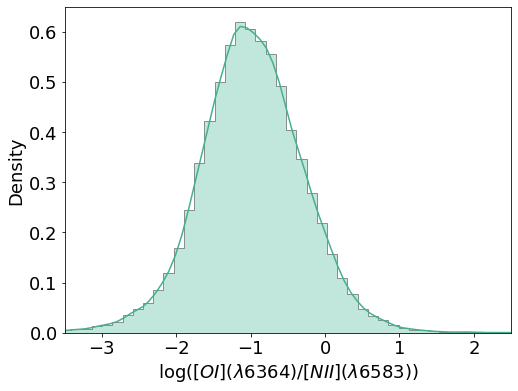

In [36]:
x = OIR_NIIR_data['OIR_FLUX']/OIR_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([OI](\\lambda 6300)/[NII](\\lambda 6583))$')

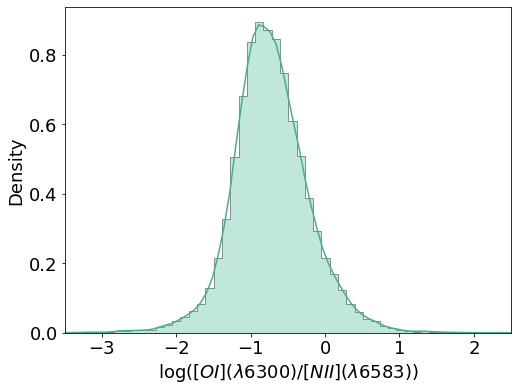

In [37]:
x = OIB_NIIR_data['OIB_FLUX']/OIR_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([NII](\\lambda 6548)/[NII](\\lambda 6583))$')

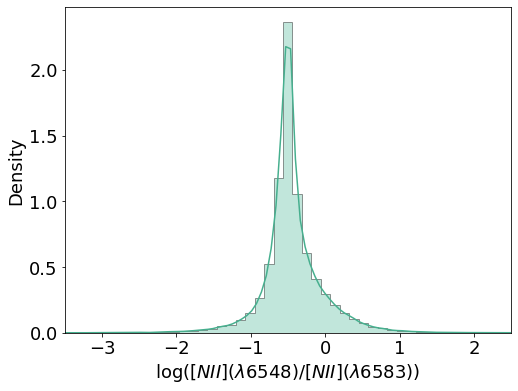

In [38]:
x = NIIB_NIIR_data['NIIB_FLUX']/NIIB_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 150)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([SII](\\lambda 6731)/[NII](\\lambda 6583))$')

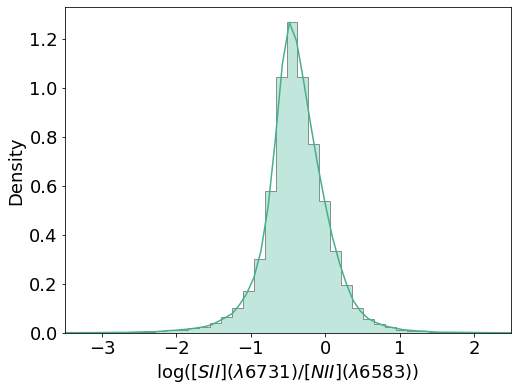

In [39]:
x = SIIR_NIIR_data['SIIR_FLUX']/SIIR_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6731)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([SII](\\lambda 6716)/[NII](\\lambda 6583))$')

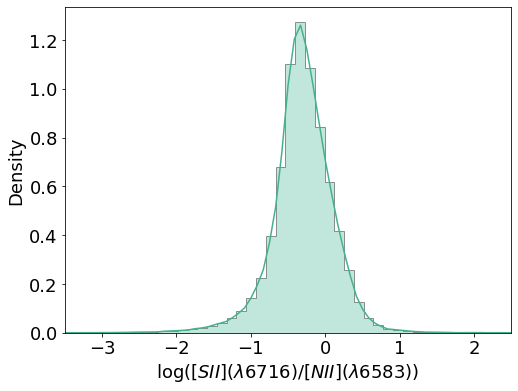

In [40]:
x = SIIB_NIIR_data['SIIB_FLUX']/SIIR_NIIR_data['NIIR_FLUX']
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([SII](\lambda 6716)/[NII](\lambda 6583))$')

Text(0.5, 0, '$\\log([OIII](\\lambda 5007)/[\\mathrm{SII}](\\lambda 6716,6731))$')

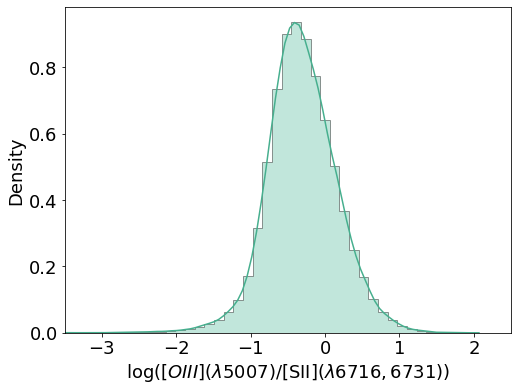

In [41]:
x = OIIIR_SII_data['OIIIR_FLUX']/(OIIIR_SII_data['SIIR_FLUX']+OIIIR_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 5007)/[\mathrm{SII}](\lambda 6716,6731))$')

Text(0.5, 0, '$\\log([OIII](\\lambda 4959)/[\\mathrm{SII}](\\lambda 6716,6731))$')

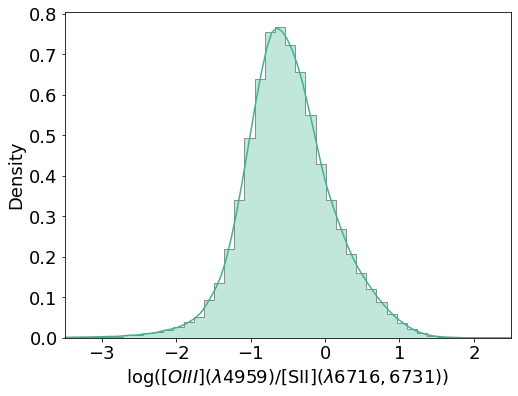

In [42]:
x = OIIIB_SII_data['OIIIB_FLUX']/(OIIIB_SII_data['SIIR_FLUX']+OIIIB_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OIII](\lambda 4959)/[\mathrm{SII}](\lambda 6716,6731))$')

Text(0.5, 0, '$\\log([OII](\\lambda 3729)/[\\mathrm{SII}](\\lambda 6716,6731))$')

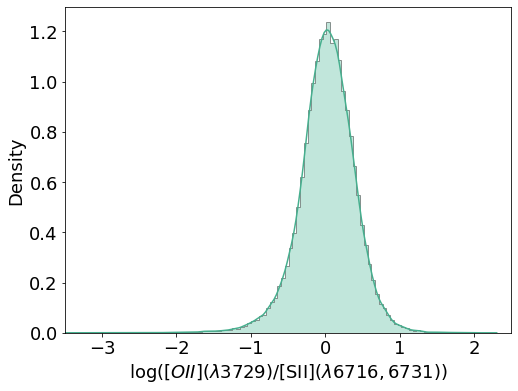

In [43]:
x = OIIR_SII_data['OIIR_FLUX']/(OIIR_SII_data['SIIR_FLUX']+OIIR_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3729)/[\mathrm{SII}](\lambda 6716,6731))$')

Text(0.5, 0, '$\\log([OII](\\lambda 3726)/[\\mathrm{SII}](\\lambda 6716,6731))$')

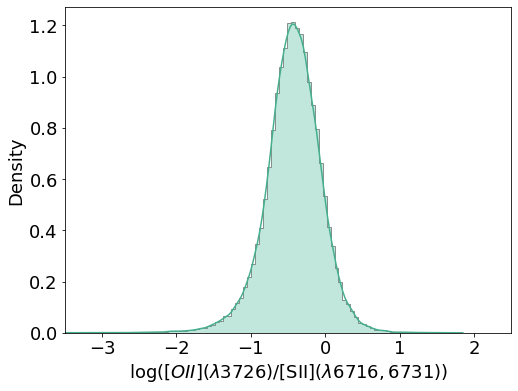

In [44]:
x = OIIB_SII_data['OIIB_FLUX']/(OIIB_SII_data['SIIR_FLUX']+OIIB_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OII](\lambda 3726)/[\mathrm{SII}](\lambda 6716,6731))$')

Text(0.5, 0, '$\\log([OI](\\lambda 6364)/[\\mathrm{SII}](\\lambda 6716,6731))$')

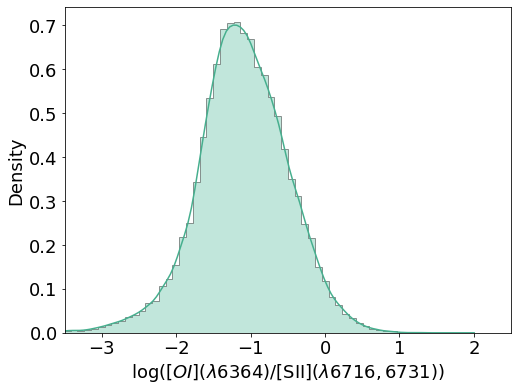

In [45]:
x = OIR_SII_data['OIR_FLUX']/(OIR_SII_data['SIIR_FLUX']+OIR_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6364)/[\mathrm{SII}](\lambda 6716,6731))$')

Text(0.5, 0, '$\\log([OI](\\lambda 6300)/[\\mathrm{SII}](\\lambda 6716,6731))$')

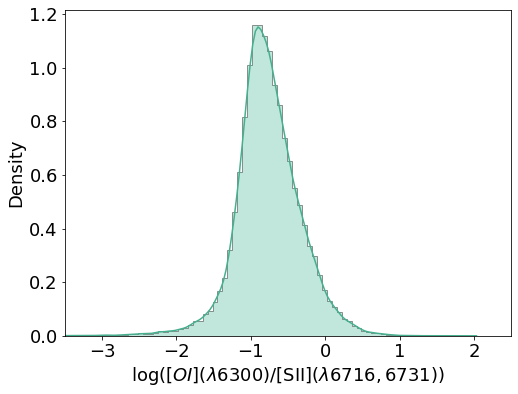

In [46]:
x = OIB_SII_data['OIB_FLUX']/(OIB_SII_data['SIIR_FLUX']+OIB_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([OI](\lambda 6300)/[\mathrm{SII}](\lambda 6716,6731))$')

Text(0.5, 0, '$\\log([NII](\\lambda 6583)/[\\mathrm{SII}](\\lambda 6716,6731))$')

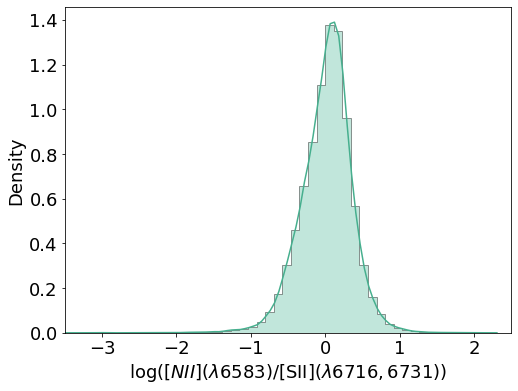

In [47]:
x = NIIR_SII_data['NIIR_FLUX']/(NIIR_SII_data['SIIR_FLUX']+NIIR_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6583)/[\mathrm{SII}](\lambda 6716,6731))$')

Text(0.5, 0, '$\\log([NII](\\lambda 6548)/[\\mathrm{SII}](\\lambda 6716,6731))$')

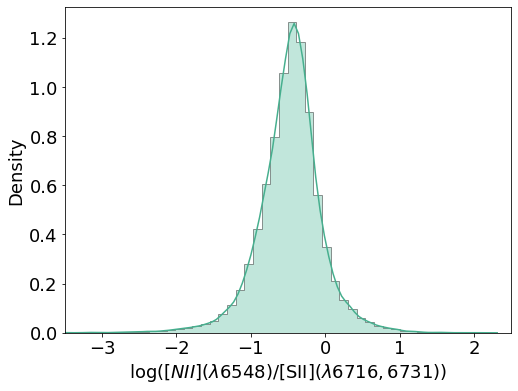

In [48]:
x = NIIB_SII_data['NIIB_FLUX']/(NIIB_SII_data['SIIR_FLUX']+NIIB_SII_data['SIIB_FLUX'])
bins = np.linspace(min(np.log(x)), max(np.log10(x)), 200)

n, bins, patches = plt.hist(np.log10(x), color=palette[0], alpha=0.4, bins=bins,
                                        edgecolor='black',
                                        density=True, histtype='stepfilled')

sns.kdeplot(np.log10(x), color=palette_darker[0])

plt.xlim(-3.5, 2.5)
plt.xlabel(r'$\log([NII](\lambda 6548)/[\mathrm{SII}](\lambda 6716,6731))$')